In [1]:
from google.colab import files
uploaded = files.upload()

Saving Covid_19_data_TM_JE.csv to Covid_19_data_TM_JE.csv


In [2]:
import pandas as pd
data = pd.read_csv('Covid_19_data_TM_JE.csv', delimiter=',')
data.head()

,positive,negative,on_ventilator_cumulative,recovered,x2020_pop,tests_per_pop,deaths
0,185,6099,0,0,734002,0.008561,6
1,1796,11282,0,0,4908621,0.002664,45
2,830,10412,39,97,3038999,0.003699,16
3,2269,25141,0,0,7378494,0.003715,64
4,13438,103095,0,0,39937489,0.002918,319


In [0]:
import numpy as np
dataset = np.genfromtxt('Covid_19_data_TM_JE.csv', delimiter=",", skip_header = True) 

In [0]:
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [5]:
print('')
print(dataset.shape)
print('')
print(dataset[0:5])


(1604, 7)

[[ 185.0  6099.0  0.0  0.0  734002.0  0.0  6.0]
 [ 1796.0  11282.0  0.0  0.0  4908621.0  0.0  45.0]
 [ 830.0  10412.0  39.0  97.0  3038999.0  0.0  16.0]
 [ 2269.0  25141.0  0.0  0.0  7378494.0  0.0  64.0]
 [ 13438.0  103095.0  0.0  0.0  39937489.0  0.0  319.0]]


In [0]:
# Select deaths as the output (Y)
Y = dataset[:, 6] 
# All others as the input (X)
X = dataset[:, [0,1,2,3,4,5]]

In [0]:
# Standardization
mean = X.mean(axis = 0)
X -= mean
std = X.std(axis = 0)
X /= std

# Rescaling
Ymax = Y.max()
Y = Y / Ymax

In [8]:
print(X.shape)
print(X[:5, :])

(1604, 6)
[[-0.2 -0.1 -0.1 -0.1 -0.8  3.2]
 [ 0.0  0.3 -0.1 -0.1 -0.2  0.5]
 [-0.1  0.2  1.1  0.1 -0.5  1.0]
 [ 0.1  1.1 -0.1 -0.1  0.1  1.0]
 [ 1.6  5.9 -0.1 -0.1  4.4  0.6]]


In [9]:
print(Y[:5])

[ 0.0  0.0  0.0  0.0  0.1]


In [10]:
import plotly.express as px
d = {'positive': dataset[:, 0], 'negative': dataset[:, 1], 'deaths': dataset[:, 6]}
df = pd.DataFrame(data=d)

fig = px.scatter_3d(df,
              x='positive', 
              y='negative',
              z='deaths', 
              opacity = 0.4)
fig.show()

In [11]:
d = {'ventilated': dataset[:, 2], 'tests/pop': dataset[:, 5], 'deaths': dataset[:, 6]}
df = pd.DataFrame(data=d)

fig = px.scatter_3d(df,
              x='ventilated', 
              y='tests/pop',
              z='deaths', 
              opacity = 0.4)
fig.show()

In [0]:

dataset1 = data.to_numpy()
index_30percent = int(0.3 * len(dataset1[:, 0]))
LRM_XVALID = dataset1[:index_30percent, [0, 1, 2, 3, 4, 5]]
LRM_YVALID = dataset1[:index_30percent, 6]
LRM_XTRAIN = dataset1[index_30percent:, [0, 1, 2, 3, 4, 5]]
LRM_YTRAIN = dataset1[index_30percent:, 6]
#Linear Regression Model Single
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

LRM = Sequential()
LRM.add(Dense(1, input_dim = 6, activation='linear'))

In [0]:
LRM.compile(loss='mae', optimizer = 'rmsprop', metrics=['mae'])
hist_LRM = LRM.fit(LRM_XTRAIN, LRM_YTRAIN, validation_data=(LRM_XVALID, LRM_YVALID), epochs = 256, verbose = 0)

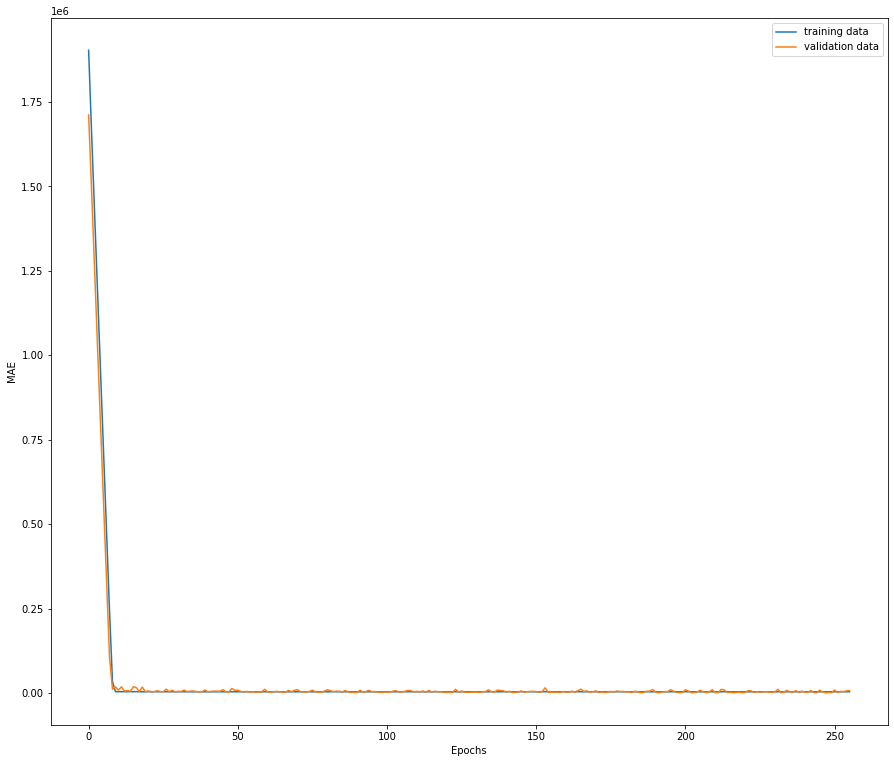

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,13))
plt.plot(hist_LRM.history['mae']) # replace with accuracy
plt.plot(hist_LRM.history['val_mae']) # replace with val_accuracy, etc.
plt.ylabel('MAE') #Mean Absolute Error
plt.xlabel('Epochs')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

In [0]:
# Predict for validation set
np.set_printoptions(precision = 2)
prediction = LRM.predict(LRM_XVALID)
# Evaluate on validation set
print('Actual Deaths :')
print(LRM_YVALID[0:10])
print('\nPredicted Deaths :')
print(prediction[0:10].T)

Actual Deaths :
[  6.  45.  16.  64. 319. 126. 189.  22.  14. 218.]

Predicted Deaths :
[[  500.81  5342.26  2979.84  7404.31 42447.21  6641.66  4458.16   621.99
    872.82 21866.03]]


In [0]:
#add a layer
mean = LRM_XTRAIN.mean(axis = 0)
LRM_XTRAIN -= mean
std = LRM_XTRAIN.std(axis = 0)
LRM_XTRAIN /= std
LRM_XVALID -= mean
LRM_XVALID /= std

In [0]:
# Build the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

LRM = Sequential()
LRM.add(Dense(5, input_dim = 6, activation='relu'))
LRM.add(Dense(1, activation='linear'))

In [0]:
LRM.compile(loss='mae', optimizer = 'rmsprop', metrics=['mae'])
hist_LRM = LRM.fit(LRM_XTRAIN, LRM_YTRAIN, validation_data=(LRM_XVALID, LRM_YVALID), epochs = 256, verbose=0)

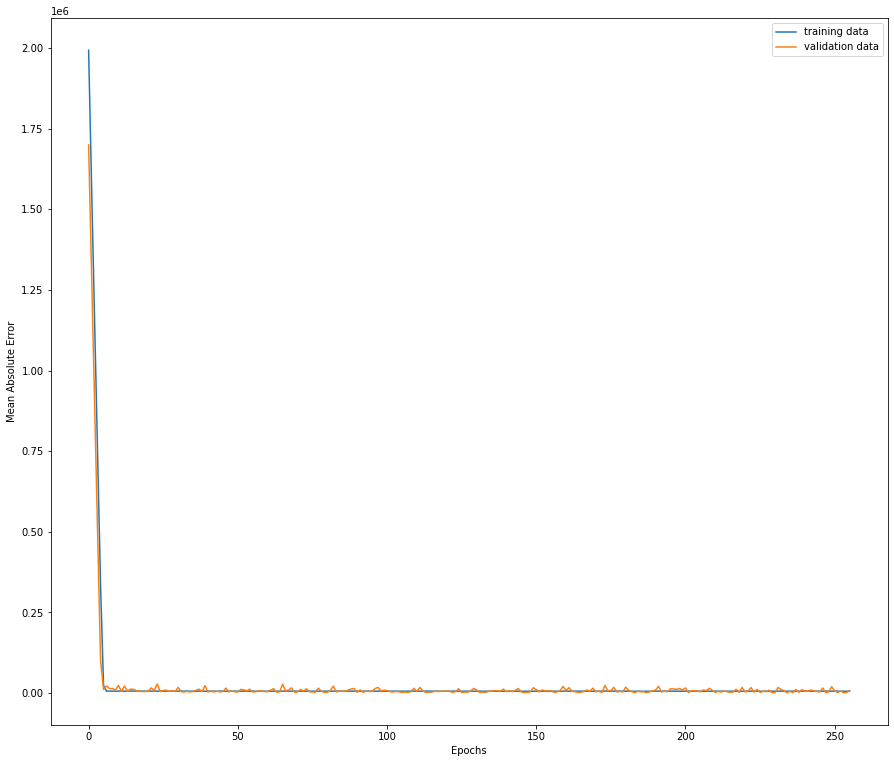

In [0]:
plt.figure(figsize=(15,13))
plt.plot(hist_LRM.history['mae'])
plt.plot(hist_LRM.history['val_mae'])
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

In [0]:
# Predict for validation set
np.set_printoptions(precision = 2)
prediction = LRM.predict(LRM_XVALID)
# Evaluate on validation set
print('Actual Deaths :')
print(LRM_YVALID[0:10])
print('\nPredicted Deaths :')
print(prediction[0:10].T.round(2))

Actual Deaths :
[  6.  45.  16.  64. 319. 126. 189.  22.  14. 218.]

Predicted Deaths :
[[ 1321.85  5817.35  4030.07  9674.29 48807.1   6683.73  3665.92  1064.24
   1465.37 29563.6 ]]


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim = 6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [0]:
model.compile(loss='mse', optimizer = 'rmsprop', metrics=['mse'])
model.fit(X, Y, epochs = 256, verbose = 0)

## Assess the predictions

In [0]:
np.set_printoptions(precision = 2)
print ('True Data:')
print(Y[:10])
prediction = model.predict(X)
print ('Prediction:')
print(prediction[0:10].T)

True Data:
[0.   0.01 0.   0.02 0.08 0.03 0.05 0.01 0.   0.05]
Prediction:
[[ 2.57e-03  2.57e-03 -2.82e-05  1.67e-02  6.78e-02  3.36e-02  3.82e-02
   3.74e-03  2.57e-03  7.06e-02]]


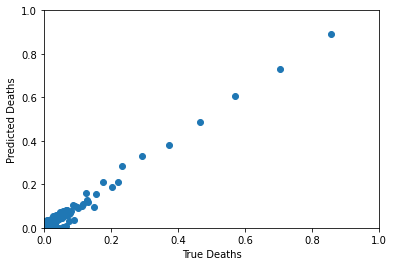

In [0]:
import matplotlib.pyplot as plt

plt.scatter(Y, prediction)
plt.ylabel('Predicted Deaths')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('True Deaths')
plt.show()

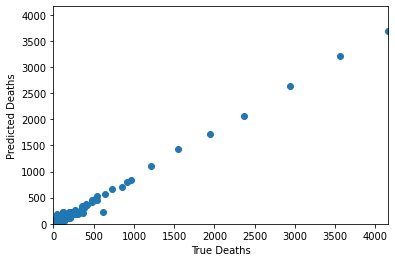

In [0]:
# Obtain the actual ages
Pactual = prediction.flatten() * Ymax
Yactual = Y.flatten() * Ymax

plt.scatter(Yactual, Pactual)
plt.ylabel('Predicted Deaths')
plt.xlim(0, Ymax)
plt.ylim(0, Ymax)
plt.xlabel('True Deaths')
plt.show()

# Quantitative evaluation of mode the model using MAE

In [0]:
diff = abs(Pactual - Yactual)

In [0]:
print(Yactual[:10])
print(Pactual[:10])
print(diff[:10])

[  6.  45.  16.  64. 319. 126. 189.  22.  14. 218.]
[ 11.68  35.46  13.43  35.   199.77  83.9  157.31  29.05  24.14 212.65]
[  5.68   9.54   2.57  29.   119.23  42.1   31.69   7.05  10.14   5.35]


In [0]:
diff.mean()

13.04960398357408

In [0]:
diff.std()

25.7794862567982

In [0]:
diff.max()

475.29931640625

In [0]:
diff.min()

0.005407225340604782

In [0]:
noOutput = data
noOutput.describe().T

,count,mean,std,min,25%,50%,75%,max
positive,1604.0,1.502624e+03,7.261589e+03,0.0,1.100000e+01,1.060000e+02,6.432500e+02,1.220310e+05
negative,1604.0,7.118349e+03,1.613627e+04,0.0,9.100000e+01,1.113500e+03,6.579250e+03,1.802490e+05
on_ventilator_cumulative,1604.0,3.205736e+00,3.195941e+01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,5.350000e+02
recovered,1604.0,4.563155e+01,5.559402e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.218700e+04
x2020_pop,1604.0,6.648308e+06,7.500173e+06,567025.0,1.826156e+06,4.645184e+06,7.797095e+06,3.993749e+07
tests_per_pop,1604.0,1.478895e-03,2.231617e-03,0.0,2.547463e-05,3.590630e-04,2.258463e-03,1.554901e-02
deaths,1604.0,3.278055e+01,1.923532e+02,0.0,0.000000e+00,1.000000e+00,1.100000e+01,4.159000e+03


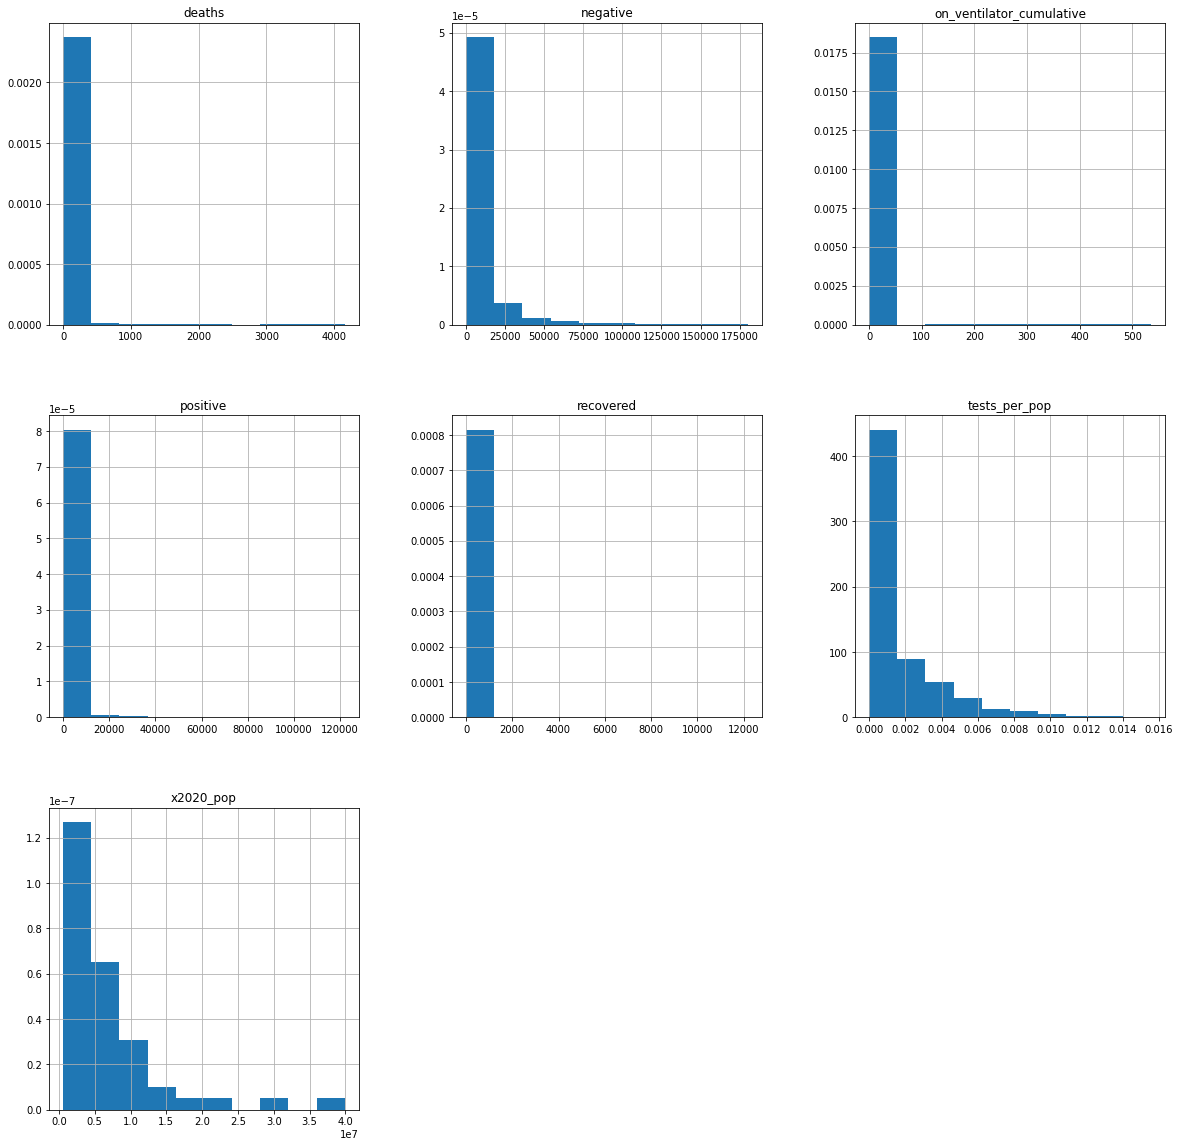

In [0]:
hist = noOutput.hist(figsize=(20,20),density=True)

In [0]:
# Mean normalization
min = X.min(axis = 0) 
max = X.max(axis = 0) 
mean = X.mean(axis = 0)
X = (X - mean) / (max - min)

In [0]:
# Shuffle
import random
np.random.shuffle(dataset)
# Index for 30%
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)
# Split into training and validation
XVALID = dataset[:index_30percent, :-1]
YVALID = dataset[:index_30percent, -1]

XTRAIN = dataset[index_30percent:, :-1]
YTRAIN = dataset[index_30percent:, -1]

481


In [0]:
mean = XTRAIN.mean(axis=0)
XTRAIN -= mean
std = XTRAIN.std(axis=0)
XTRAIN /= std
XVALID -= mean
XVALID /= std

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(250, input_dim = len(XTRAIN[0, :]), activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
#model.summary()
model.compile(loss='mse', optimizer = 'rmsprop', metrics=['mae'])
model.fit(XTRAIN, YTRAIN, epochs = 256, verbose =0)

{'verbose': 0, 'epochs': 256, 'steps': 36}


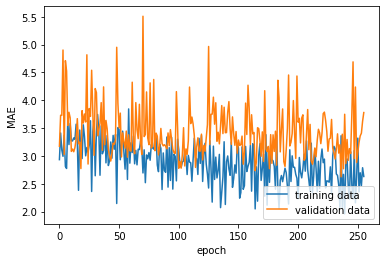

In [0]:
# Do the training (specify the validation set as well)
hist = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 256, verbose = 0)
# Check what's in the history
print(history.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(hist.history['mae']) # replace with accuracy/MAE
plt.plot(hist.history['val_mae']) # replace with val_accuracy, etc.
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

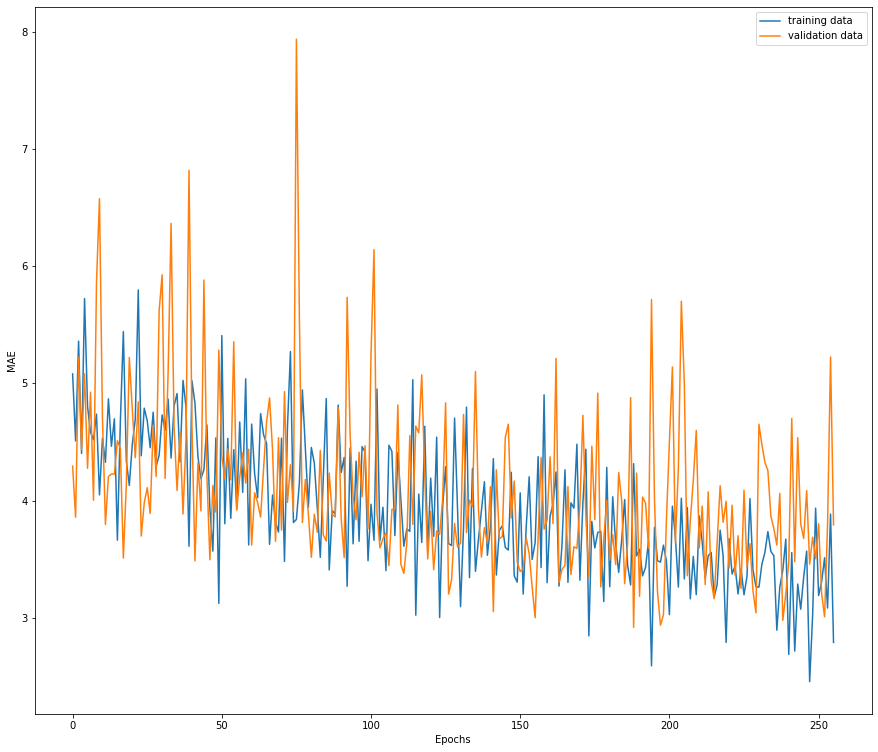

In [0]:
#Learning Curve
plt.figure(figsize=(15,13))
plt.plot(history.history['mae']) # replace with accuracy
plt.plot(history.history['val_mae']) # replace with val_accuracy, etc.
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(250, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(150, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(1, activation='linear'))
#model.summary()
model.compile(loss='mse', optimizer = 'rmsprop', metrics=['mae'])
model.fit(XTRAIN, YTRAIN, epochs = 256, verbose = 0)

{'verbose': 0, 'epochs': 256, 'steps': 36}


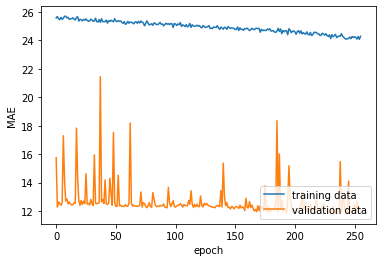

In [0]:
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 256, verbose = 0)
# Check what's in the history
print(history.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['mae']) # replace with accuracy/MAE
plt.plot(history.history['val_mae']) # replace with val_accuracy, etc.
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

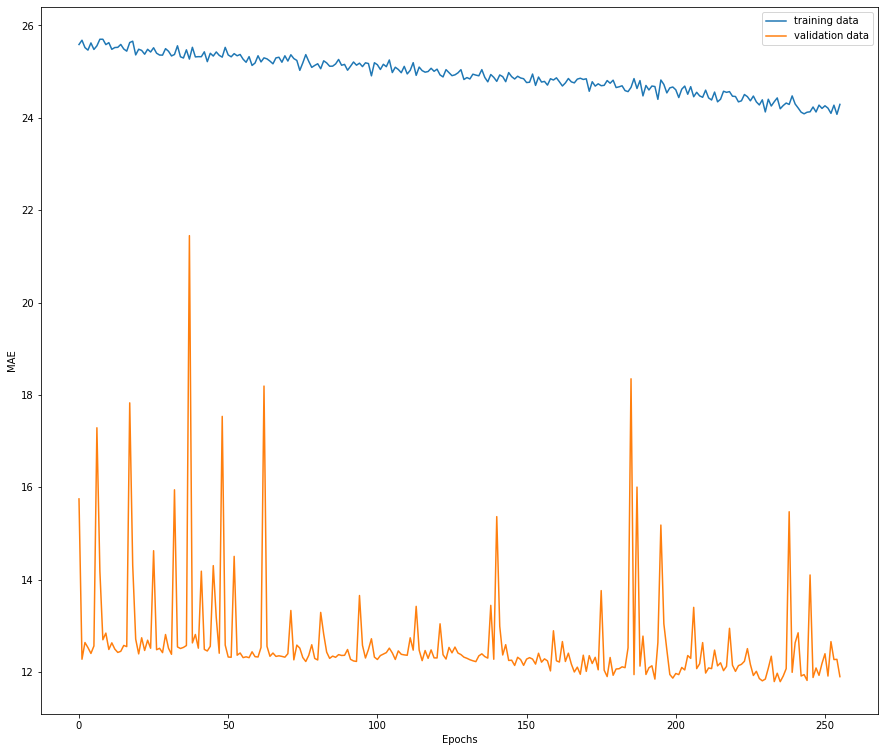

In [0]:
#Learning Curve
plt.figure(figsize=(15,13))
plt.plot(history.history['mae']) # replace with accuracy
plt.plot(history.history['val_mae']) # replace with val_accuracy, etc.
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

481
1604
{'verbose': 0, 'epochs': 500, 'steps': 36}


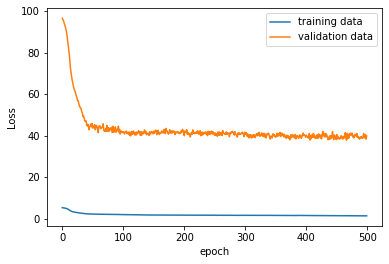

In [14]:
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)
print(int(len(dataset[:, 0])))
# Split into training and validation
XVALID = dataset[:index_30percent, [0, 1, 2, 3, 4, 5]]
YVALID = dataset[:index_30percent, 6]
XTRAIN = dataset[index_30percent:, [0, 1, 2, 3, 4, 5]]
YTRAIN = dataset[index_30percent:, 6]
mean = XTRAIN.mean(axis = 0)
XTRAIN -= mean
std = XTRAIN.std(axis = 0)
XTRAIN /= std
XVALID -= mean
XVALID /= std
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim = 6, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer = 'rmsprop', metrics=['mae'])
thing = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 500, verbose = 0)
import matplotlib.pyplot as plt
# Check what's in the history
print(thing.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(thing.history['loss']) # replace with accuracy/MAE
plt.plot(thing.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

In [0]:
# optimal setup
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim = 6, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer = 'rmsprop', metrics=['mae'])
thing = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 400, verbose = 0)

{'verbose': 0, 'epochs': 400, 'steps': 36}


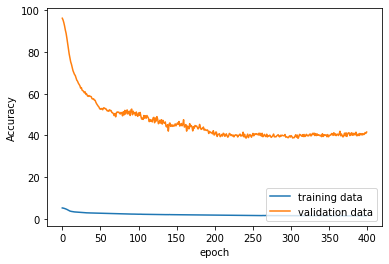

In [16]:
import matplotlib.pyplot as plt
# Check what's in the history
print(thing.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(thing.history['mae']) # replace with accuracy/MAE
plt.plot(thing.history['val_mae']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [0]:
# The above appears to be the optimal number of layers, neurons, epochs, etc. 
# It is shown that models further up with different number of layers and neurons do not
# perform as well
# Parameters such as number of neurons, number of layers, number of epochs, etc. are
# called hyper-parameters because they are external configurations of the model 
# and their values are set by the author and cannot be estimated from data. 
# One key feature of hyper-parameters is that there are no perfect matches for 
# all modeling problems. Instead, they must be observed to be a best fit for a given problem.
# Parameters on the other hand are learned from the data and needed
# by the model to make its predictions. Furthermore, they are used to help estimate 
# model parameters and are tuned to imporve the predictive modeling problem.

In [23]:
# Select age as the output (Y)
Y = dataset[:, 6] 
# All others as the input (X)
X = dataset[:, [0,1,2,3, 4, 5]]
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)
print(int(len(dataset[:, 0])))
# Split into training and validation
XVALID = dataset[:index_30percent, [0, 1, 2, 3, 4, 5]]
YVALID = dataset[:index_30percent, 6]
XTRAIN = dataset[index_30percent:, [0, 1, 2, 3, 4, 5]]
YTRAIN = dataset[index_30percent:, 6]
mean = XTRAIN.mean(axis = 0)
XTRAIN -= mean
std = XTRAIN.std(axis = 0)
XTRAIN /= std
XVALID -= mean
XVALID /= std
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim = 6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer = 'rmsprop', metrics=['mae'])
thing = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 400, verbose = 0)
np.set_printoptions(precision = 2)
print ('True Data:')
print(YVALID[:20])
prediction = model.predict(XVALID)
print ('Prediction:')
print(prediction[0:20].T)

481
1604
True Data:
[  6.  45.  16.  64. 319. 126. 189.  22.  14. 218. 211.   4.  22.  10.
 274. 127.  22.  40. 477. 231.]
Prediction:
[[ 35.82  33.32  12.24  81.58 186.4   95.61 139.71  32.76  24.08 217.46
   79.04  46.95   4.01  33.05 160.85  84.69  10.22  31.01 363.81 312.48]]
